In [1]:
##########################################################################                    
############################ DATA PREPARATION ############################
##########################################################################

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

"""Script to process IMDB dataset"""

                        ######################################                    
                        #### POSITIVE REVIEWS TRAIN DATA #####
                        ######################################
            


path_pos = 'aclImdb/train/pos/'
filelist_pos = os.listdir(path_pos) ####the fileist is not ordered by name of file 
data_pos= []
j=0
id_rating_pos = []

import string
table = str.maketrans('', '', string.punctuation)

#iterate through files in directory
for file in filelist_pos:
    f = open(path_pos+file, 'r', encoding='utf8')
    data_pos.append((f.read()))
    
    name = os.path.splitext(file)[0]
    id_rating_pos.append(name.split("_"))
    
    j=j+1
    f.close()
    
#### Get the y_train as the ratings
rating_pos = []

for i in id_rating_pos:
    #rating_pos.append(i[1])
    rating_pos.append('1') # as per myCourses announcement, should do binary classification - all pos reviews labeled '1'
    
                        ######################################                    
                        #### NEGATIVE REVIEWS TRAIN DATA #####
                        ######################################

## directory: aclImdb/train/pos/FILES & aclImdb/train/neg/FILES ##
path_neg = 'aclImdb/train/neg/'
filelist_neg = os.listdir(path_neg) ####the fileist is not ordered by name of file 
data_neg= []
i=0
id_rating_neg = []

import string
table = str.maketrans('', '', string.punctuation)

#iterate through files in directory
for file in filelist_neg:
    f = open(path_neg+file, 'r', encoding='utf8')
    data_neg.append((f.read()))
    
    name = os.path.splitext(file)[0]
    id_rating_neg.append(name.split("_"))
    
    i=i+1
    f.close()

rating_neg = []

for i in id_rating_neg:
    #rating_neg.append(i[1])
    rating_neg.append('0') # as per myCourses announcement, should do binary classification - all neg reviews labeled '0'
    
##### ##### ##### ##### ##### ##### ##### ##### ###
##### APPEND BOTH POS & NEG TRAINING DATASETS #####
##### ##### ##### ##### ##### ##### ##### ##### ###

X_train_IMDb = data_pos+data_neg # as a list
X_train_IMDb_np = np.array(X_train_IMDb) # NOT NEEDED
y_train_IMDb = np.array(rating_pos+rating_neg)# as a numpy array
    
                        ######################################                    
                        #### POSITIVE REVIEWS TEST DATA #####
                        ######################################
            


path_pos_test = 'aclImdb/test/pos/'
filelist_pos_test = os.listdir(path_pos_test) ####the fileist is not ordered by name of file 
data_pos_test= []
j=0
id_rating_pos_test = []

import string
table = str.maketrans('', '', string.punctuation)

#iterate through files in directory
for file in filelist_pos_test:
    f = open(path_pos_test+file, 'r', encoding='utf8')
    data_pos_test.append((f.read()))
    
    name = os.path.splitext(file)[0]
    id_rating_pos_test.append(name.split("_"))
    
    j=j+1
    f.close()

#### Get the y_train as the ratings
rating_pos_test = []

for i in id_rating_pos_test:
    #rating_pos_test.append(i[1])
    rating_pos_test.append('1') # as per myCourses announcement, should do binary classification - all pos reviews labeled '1'

                        ######################################                    
                        #### NEGATIVE REVIEWS TEST DATA #####
                        ######################################

path_neg_test = 'aclImdb/test/neg/'
filelist_neg_test = os.listdir(path_neg_test) ####the fileist is not ordered by name of file 
data_neg_test= []
i=0
id_rating_neg_test = []

import string
table = str.maketrans('', '', string.punctuation)

#iterate through files in directory
for file in filelist_neg_test:
    f = open(path_neg_test+file, 'r', encoding='utf8')
    data_neg_test.append((f.read()))
    
    name = os.path.splitext(file)[0]
    id_rating_neg_test.append(name.split("_"))
    
    i=i+1
    f.close()
    

rating_neg_test = []

for i in id_rating_neg_test:
    #rating_neg_test.append(i[1])
    rating_neg_test.append('0') # as per myCourses announcement, should do binary classification - all neg reviews labeled '0'
    
##### ##### ##### ##### ##### ##### ##### ##### ##
##### APPEND BOTH POS & NEG TESTING DATASETS #####
##### ##### ##### ##### ##### ##### ##### ##### ##

X_test_IMDb = data_pos_test+data_neg_test # as a list
X_test_IMDb_np = np.array(X_test_IMDb) # NOT NEEDED
y_test_IMDb = np.array(rating_pos_test+rating_neg_test)# as a numpy array

"""Define count vectorizer and tf-idf transformations"""

###### Count Vectorizer #######
from sklearn.feature_extraction.text import CountVectorizer
### Filter out these stopwords ####
stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
#### Filter: Stopwords, token_pattern filters out the non-letter characters
count_vect = CountVectorizer(analyzer='word', stop_words = stopwords,  token_pattern = r'\b[^\d\W_/]+\b')

########## TFIDF ############
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=True,smooth_idf=True) # turned on idf and smooth idf

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
No handles with labels found to put in legend.


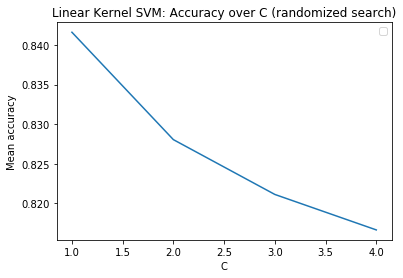

No handles with labels found to put in legend.


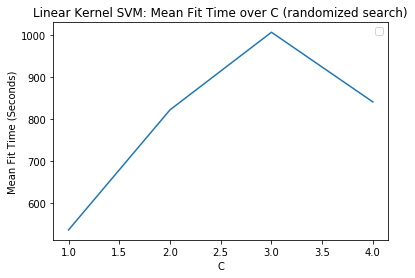

Best CV score (Linear Kernel SVM): 0.8416
Best estimators (Linear Kernel SVM): {'clf__kernel': 'linear', 'clf__C': 1}


NameError: name 'twenty_test' is not defined

In [2]:
#######################################
########## LINEAR KERNEL SVM ##########
#######################################

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt 
import os

if not os.path.exists('kernel_SVM'):
  os.makedirs('kernel_SVM')

kernel_svm_clf = SVC()

# Test C = 1,2,3,4
kernel_svm_params_lin = {'clf__kernel':['linear'],'clf__C':[1,2,3,4]}

# Test C = 0.25,0.5,0.75,1
#kernel_svm_params_lin = {'clf__kernel':['linear'],'clf__C':[0.25,0.5,0.75,1]}

kernel_svm_pipeline_lin = Pipeline([('vect', count_vect), ('tfidf', tfidf_transformer), ('clf', kernel_svm_clf)])

kernel_svm_CV_lin = RandomizedSearchCV(kernel_svm_pipeline_lin, kernel_svm_params_lin, cv=5, n_jobs=-1) # 5-fold cross-val
kernel_svm_CV_lin.fit(X_train_IMDb, y_train_IMDb)

plt.plot(list(kernel_svm_CV_lin.cv_results_.get('param_clf__C')), kernel_svm_CV_lin.cv_results_.get('mean_test_score'))

plt.xlabel("C")
plt.ylabel("Mean accuracy")
plt.title("Linear Kernel SVM: Accuracy over C (randomized search)")
plt.savefig("kernel_SVM/linear_kernel_SVM_accuracy.png")
plt.show()

plt.plot(list(kernel_svm_CV_lin.cv_results_.get('param_clf__C')), kernel_svm_CV_lin.cv_results_.get('mean_fit_time'))

plt.xlabel("C")
plt.ylabel("Mean Fit Time (Seconds)")
plt.title("Linear Kernel SVM: Mean Fit Time over C (randomized search)")
plt.savefig("kernel_SVM/linear_kernel_SVM_time.png")
plt.show()


print("Best CV score (Linear Kernel SVM): " + str(kernel_svm_CV_lin.best_score_))
print("Best estimators (Linear Kernel SVM): " + str(kernel_svm_CV_lin.best_params_))
print("Test accuracy of Linear Kernel SVM with best params: " + str(kernel_svm_CV_lin.best_estimator_.score(X_test_IMDb, y_test_IMDb)))

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
No handles with labels found to put in legend.


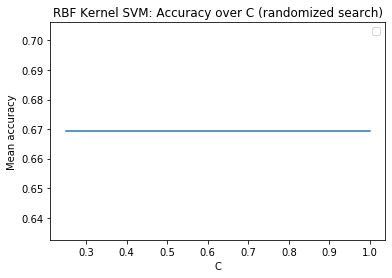

No handles with labels found to put in legend.


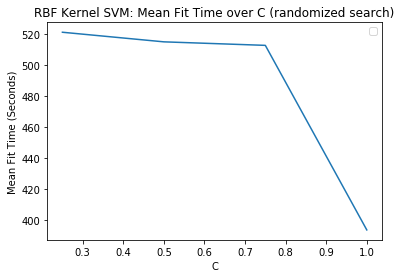

Best CV score (RBF Kernel SVM): 0.66932
Best estimators (RBF Kernel SVM): {'clf__kernel': 'rbf', 'clf__C': 0.25}
Test accuracy of RBF Kernel SVM with best params: 0.67236


In [7]:
############################
###### RBF Kernel SVM ###### 
############################

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt 
import os

if not os.path.exists('kernel_SVM'):
  os.makedirs('kernel_SVM')

kernel_svm_clf = SVC()


# Test C = 1,2,3,4
kernel_svm_params = {'clf__kernel':['rbf'],'clf__C':[1,2,3,4]}

# Test C = 0.25,0.5,0.75,1
#kernel_svm_params = {'clf__kernel':['rbf'],'clf__C':[0.25,0.5,0.75,1]}

kernel_svm_pipeline = Pipeline([('vect', count_vect), ('tfidf', tfidf_transformer), ('clf', kernel_svm_clf)])

kernel_svm_CV = RandomizedSearchCV(kernel_svm_pipeline, kernel_svm_params, cv=5, n_jobs=-1) # 5-fold cross-val
kernel_svm_CV.fit(X_train_IMDb, y_train_IMDb)

plt.plot(list(kernel_svm_CV.cv_results_.get('param_clf__C')), kernel_svm_CV.cv_results_.get('mean_test_score'))

plt.xlabel("C")
plt.ylabel("Mean accuracy")
plt.title("RBF Kernel SVM: Accuracy over C (randomized search)")
plt.savefig("kernel_SVM/rbf_kernel_SVM_accuracy.png")
plt.show()

plt.plot(list(kernel_svm_CV.cv_results_.get('param_clf__C')), kernel_svm_CV.cv_results_.get('mean_fit_time'))

plt.xlabel("C")
plt.ylabel("Mean Fit Time (Seconds)")
plt.title("RBF Kernel SVM: Mean Fit Time over C (randomized search)")
plt.savefig("kernel_SVM/rbf_kernel_SVM_time.png")
plt.show()


print("Best CV score (RBF Kernel SVM): " + str(kernel_svm_CV.best_score_))
print("Best estimators (RBF Kernel SVM): " + str(kernel_svm_CV.best_params_))
print("Test accuracy of RBF Kernel SVM with best params: " + str(kernel_svm_CV.best_estimator_.score(X_test_IMDb, y_test_IMDb)))

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
No handles with labels found to put in legend.


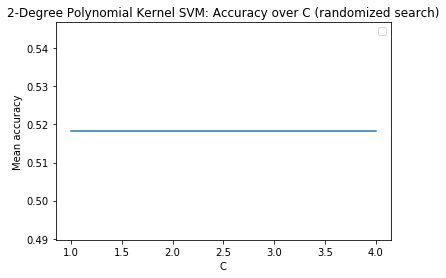

No handles with labels found to put in legend.


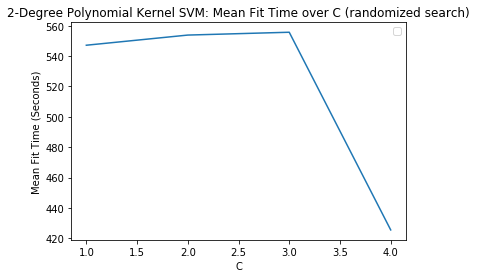

Best CV score (2-Degree Polynomial Kernel SVM): 0.51824
Best estimators (2-Degree Polynomial Kernel SVM): {'clf__kernel': 'poly', 'clf__degree': 2, 'clf__C': 1}
Test accuracy of Random Forest (2-Degree Polynomial Kernel SVM) with best params: 0.5138


In [8]:
############################################
###### 2-Degree Polynomial Kernel SVM ###### 
############################################

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt 
import os

if not os.path.exists('kernel_SVM'):
  os.makedirs('kernel_SVM')

kernel_svm_clf = SVC()

# Test C = 1,2,3,4 
kernel_svm_params_poly = {'clf__kernel':['poly'],'clf__degree':[2],'clf__C':[1,2,3,4]}

# Test C = 0.25,0.5,0.75,1
# kernel_svm_params_poly = {'clf__kernel':['poly'],'clf__degree':[2],'clf__C':[0.25,0.5,0.75,1]}

kernel_svm_pipeline_poly = Pipeline([('vect', count_vect), ('tfidf', tfidf_transformer), ('clf', kernel_svm_clf)])

kernel_svm_CV_poly = RandomizedSearchCV(kernel_svm_pipeline_poly, kernel_svm_params_poly, cv=5, n_jobs=-1) # 5-fold cross-val
kernel_svm_CV_poly.fit(X_train_IMDb, y_train_IMDb)

plt.plot(list(kernel_svm_CV_poly.cv_results_.get('param_clf__C')), kernel_svm_CV_poly.cv_results_.get('mean_test_score'))

plt.xlabel("C")
plt.ylabel("Mean accuracy")
plt.title("2-Degree Polynomial Kernel SVM: Accuracy over C (randomized search)")
plt.savefig("kernel_SVM/2_poly_kernel_SVM_accuracy.png")
plt.show()

plt.plot(list(kernel_svm_CV_poly.cv_results_.get('param_clf__C')), kernel_svm_CV_poly.cv_results_.get('mean_fit_time'))

plt.xlabel("C")
plt.ylabel("Mean Fit Time (Seconds)")
plt.title("2-Degree Polynomial Kernel SVM: Mean Fit Time over C (randomized search)")
plt.savefig("kernel_SVM/2_poly_kernel_SVM_time.png")
plt.show()


print("Best CV score (2-Degree Polynomial Kernel SVM): " + str(kernel_svm_CV_poly.best_score_))
print("Best estimators (2-Degree Polynomial Kernel SVM): " + str(kernel_svm_CV_poly.best_params_))
print("Test accuracy of 2-Degree Polynomial Kernel SVM with best params: " + str(kernel_svm_CV_poly.best_estimator_.score(X_test_IMDb, y_test_IMDb)))

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
No handles with labels found to put in legend.


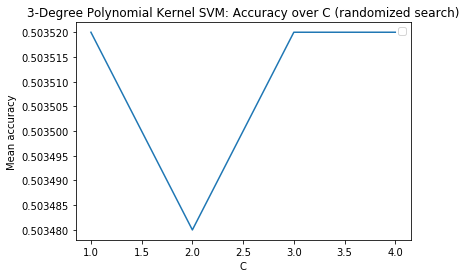

No handles with labels found to put in legend.


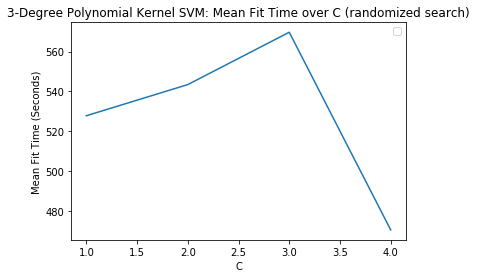

Best CV score (3-Degree Polynomial Kernel SVM): 0.50352
Best estimators (3-Degree Polynomial Kernel SVM): {'clf__kernel': 'poly', 'clf__degree': 3, 'clf__C': 1}
Test accuracy of Random Forest (3-Degree Polynomial Kernel SVM) with best params: 0.5094


In [9]:
############################################
###### 3-Degree Polynomial Kernel SVM ###### 
############################################

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt 
import os

if not os.path.exists('kernel_SVM'):
  os.makedirs('kernel_SVM')

kernel_svm_clf = SVC()

# Test C = 1,2,3,4 
kernel_svm_params_poly_3 = {'clf__kernel':['poly'],'clf__degree':[3],'clf__C':[1,2,3,4]}

# Test C = 0.25,0.5,0.75,1
# kernel_svm_params_poly_3 = {'clf__kernel':['poly'],'clf__degree':[3],'clf__C':[0.25,0.5,0.75,1]}

kernel_svm_pipeline_poly_3 = Pipeline([('vect', count_vect), ('tfidf', tfidf_transformer), ('clf', kernel_svm_clf)])

kernel_svm_CV_poly_3 = RandomizedSearchCV(kernel_svm_pipeline_poly_3, kernel_svm_params_poly_3, cv=5, n_jobs=-1) # 5-fold cross-val
kernel_svm_CV_poly_3.fit(X_train_IMDb, y_train_IMDb)

plt.plot(list(kernel_svm_CV_poly_3.cv_results_.get('param_clf__C')), kernel_svm_CV_poly_3.cv_results_.get('mean_test_score'))

plt.xlabel("C")
plt.ylabel("Mean accuracy")
plt.title("3-Degree Polynomial Kernel SVM: Accuracy over C (randomized search)")
plt.savefig("kernel_SVM/3_poly_kernel_SVM_accuracy.png")
plt.show()

plt.plot(list(kernel_svm_CV_poly_3.cv_results_.get('param_clf__C')), kernel_svm_CV_poly_3.cv_results_.get('mean_fit_time'))

plt.xlabel("C")
plt.ylabel("Mean Fit Time (Seconds)")
plt.title("3-Degree Polynomial Kernel SVM: Mean Fit Time over C (randomized search)")
plt.savefig("kernel_SVM/3_poly_kernel_SVM_time.png")
plt.show()


print("Best CV score (3-Degree Polynomial Kernel SVM): " + str(kernel_svm_CV_poly_3.best_score_))
print("Best estimators (3-Degree Polynomial Kernel SVM): " + str(kernel_svm_CV_poly_3.best_params_))
print("Test accuracy of 3-Degree Polynomial Kernel SVM with best params: " + str(kernel_svm_CV_poly_3.best_estimator_.score(X_test_IMDb, y_test_IMDb)))

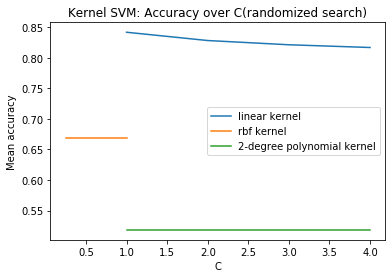

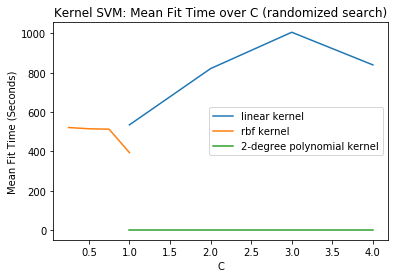

In [10]:
#########################################
###### Graph to compare the models ###### 
#########################################

plt.plot(list(kernel_svm_CV_lin.cv_results_.get('param_clf__C')), kernel_svm_CV_lin.cv_results_.get('mean_test_score'), label = 'linear kernel')
plt.plot(list(kernel_svm_CV.cv_results_.get('param_clf__C')), kernel_svm_CV.cv_results_.get('mean_test_score'), label = 'rbf kernel')
plt.plot(list(kernel_svm_CV_poly.cv_results_.get('param_clf__C')), kernel_svm_CV_poly.cv_results_.get('mean_test_score'), label = '2-degree polynomial kernel')

plt.xlabel("C")
plt.ylabel("Mean accuracy")
plt.title("Kernel SVM: Accuracy over C (randomized search)")
plt.legend()
plt.savefig("kernel_SVM/kernel_SVM_accuracy.png")
plt.show()

plt.plot(list(kernel_svm_CV_lin.cv_results_.get('param_clf__C')), kernel_svm_CV_lin.cv_results_.get('mean_fit_time'), label = 'linear kernel')
plt.plot(list(kernel_svm_CV.cv_results_.get('param_clf__C')), kernel_svm_CV.cv_results_.get('mean_fit_time'), label = 'rbf kernel')
plt.plot(list(kernel_svm_CV_poly.cv_results_.get('param_clf__C')), kernel_svm_CV_poly.cv_results_.get('mean_test_score'), label = '2-degree polynomial kernel')

plt.xlabel("C")
plt.ylabel("Mean Fit Time (Seconds)")
plt.title("Kernel SVM: Mean Fit Time over C (randomized search)")
plt.legend()
plt.savefig("kernel_SVM/kernel_SVM_time.png")
plt.show()